## Chapter 1 - Introducing Image Processing and scikit-image

Jump into digital image structures and learn to process them! 

Extract data, transform and analyze images using NumPy and Scikit-image. 

Convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

### 📒 Image Processing:

A method to perform operations on images and videos to enhance an image, extract useful information from them, analyze it and make decisions.

Image processing is a subset of computer vision.

#### Applications of Image Processing:

- Medical Image Analysis
- Artificial Intelligence
- Image Restoration and Enhancement
- Geospatial Computing
- Robotic Vision
- Surveillance

...etc

#### Purposes:

1. <u>Visualization:</u> To observe objects that are not visible
2. <u>Image Sharpening and Restoration:</u> To create a better image
3. <u>Image Retrieval:</u> To seek for the image of interest
4. <u>Measurement of Pattern:</u> To measure various objects
5. <u>Image Recognition:</u> To distinguish objects in an image

### 📒 Digital Image:

A digital image is a 2-D array or matrix of square pixels arranged in columns and rows.

*The pixels contain information about color and intensity*

So, an image can be treated as a **matrix of intensity**.

2-dimensional color images are often represented in a 3 layers of 2-D arrays or **RGB** (red, green and blue -> three channels of image)

**Grayscale Images** only have shades of black and white. Often the grayscale intensity is stored in an 8 bit integer (0-255) giving 256 possible different shades of gray.

*Grayscale images don't have any color information.*

*RGB images have 3 channels while grayscale images have a single channel*

### 1.1 Make images come alive with scikit-image

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

#### 📝 RGB to grayscale

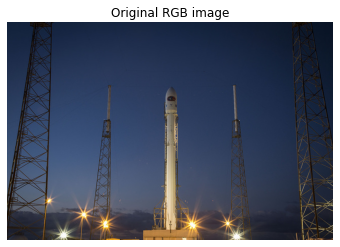

In [4]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

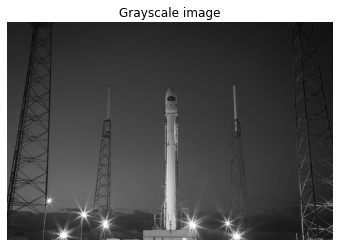

In [5]:
# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

### 1.2 NumPy for images


In [6]:
type(rocket)

numpy.ndarray

Color image is a numpy array with a third dimension for color channels. We can slice the multidimensional array and obtain these channels separately.

In [7]:
# Obtaining the red values of the image
rocket[:, :, 0]

array([[ 17,  17,  17, ...,   8,   8,   7],
       [ 17,  17,  17, ...,   8,   8,   8],
       [ 18,  18,  18, ...,   8,   8,   8],
       ...,
       [ 27,  29,  20, ..., 136, 186, 173],
       [ 26,  29,  30, ..., 103,  97,  76],
       [ 26,  29,  40, ...,  82,  79,  83]], dtype=uint8)

In [8]:
# Obtaining the green values of the image
rocket[:, :, 1]

array([[ 33,  33,  33, ...,  19,  19,  18],
       [ 33,  33,  33, ...,  19,  19,  19],
       [ 34,  34,  34, ...,  19,  19,  19],
       ...,
       [ 28,  29,  24, ..., 106, 136, 119],
       [ 27,  32,  34, ...,  67,  61,  49],
       [ 27,  32,  46, ...,  53,  50,  61]], dtype=uint8)

In [9]:
# Obtaining the blue values of the image
rocket[:, :, 2]

array([[58, 58, 59, ..., 37, 37, 36],
       [58, 58, 59, ..., 37, 37, 37],
       [59, 59, 60, ..., 37, 37, 37],
       ...,
       [32, 37, 36, ..., 82, 85, 81],
       [31, 39, 46, ..., 45, 27, 20],
       [31, 39, 60, ..., 37, 32, 37]], dtype=uint8)

In [11]:
# Accessing the shape of the image
rocket.shape

(427, 640, 3)

In [12]:
# Total number of pixels
rocket.size

819840